In [ ]:
import umap
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns

sc.settings.verbosity =0

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import Circle
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

# GENERETING AND SETTING UP DATA FOR THE PLOT

In [3]:
metadata = pd.read_csv('objects/alluvial_data_v3.csv')
metadata['Deepscore_HCA_l1_Clean'].unique()

/tmp/ipykernel_19519/3145767200.py:1: DtypeWarning: Columns (10,20,21,23,24,25,29,33,35,42,43,54,55,56,57,58,59,62,66,67,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('objects/alluvial_data_v3.csv')


array(['IMM', 'PEC', 'DCT', 'IC', 'PC', 'EC', 'TAL', 'FIB', 'POD',
       'VSM/P', 'CNT', 'PT'], dtype=object)

In [4]:
columns = []
texts_pop_col = ["PT", "TAL", "POD", 'ST','EC','IMM']#["POD", "EPI", "ENDO","IMM","ST"]

for i in ['ct_lt','ct_cb','md_lt','md_cb']:
        for j in texts_pop_col:
                columns.append(j+'_'+i)


finale = pd.DataFrame(columns=columns)#, index = ['10xMultiome-ATAC','10xMultiome-RNA','scRNA-seq 3',' scRNA-seq 5','RNA Integration','Cross Modality (GA)','Bridge','Integration','Integration','Integration'])
finale


,PT_ct_lt,TAL_ct_lt,POD_ct_lt,ST_ct_lt,EC_ct_lt,IMM_ct_lt,PT_ct_cb,TAL_ct_cb,POD_ct_cb,ST_ct_cb,...,POD_md_lt,ST_md_lt,EC_md_lt,IMM_md_lt,PT_md_cb,TAL_md_cb,POD_md_cb,ST_md_cb,EC_md_cb,IMM_md_cb


# IMPORT DATA FROM DEEPSCORE ANALYSIS

In [ ]:
col_key='_ct_lt'
#ATAC - None
idx=0
finale.loc[idx, 'PT'+col_key] = 0
finale.loc[idx, 'TAL'+col_key] = 0
finale.loc[idx, 'POD'+col_key] = 0
finale.loc[idx, 'ST'+col_key] = 0
finale.loc[idx, 'EC'+col_key] = 0
finale.loc[idx, 'IMM'+col_key] = 0
idx +=1
#snRNA
finale.loc[idx, 'PT'+col_key] = 0.90377
finale.loc[idx, 'TAL'+col_key] = 0.92916
finale.loc[idx, 'POD'+col_key] = 0.98843
finale.loc[idx, 'ST'+col_key] = 0.78108
finale.loc[idx, 'EC'+col_key] = 0.72365
finale.loc[idx, 'IMM'+col_key] = 0.2614
idx +=1
#scRNA3'
finale.loc[idx, 'PT'+col_key] = 0.95102
finale.loc[idx, 'TAL'+col_key] = 0.99102
finale.loc[idx, 'POD'+col_key] = 0.99481
finale.loc[idx, 'ST'+col_key] = 0.99287
finale.loc[idx, 'EC'+col_key] = 0.99383
finale.loc[idx, 'IMM'+col_key] = 0.9917
idx +=1
#scRNA5'
finale.loc[idx, 'PT'+col_key] = 0.94264
finale.loc[idx, 'TAL'+col_key] = 0.98148
finale.loc[idx, 'POD'+col_key] = 0.9844
finale.loc[idx, 'ST'+col_key] = 0.97652
finale.loc[idx, 'EC'+col_key] = 0.99069
finale.loc[idx, 'IMM'+col_key] = 0.98857
idx +=1
#RNA INT'
finale.loc[idx, 'PT'+col_key] = 0.98896
finale.loc[idx, 'TAL'+col_key] = 0.98465
finale.loc[idx, 'POD'+col_key] = 0.99693
finale.loc[idx, 'ST'+col_key] = 0.99314
finale.loc[idx, 'EC'+col_key] = 0.99117
finale.loc[idx, 'IMM'+col_key] = 0.98596
idx +=1
#Bridge
finale.loc[idx, 'PT'+col_key] = 0.98366
finale.loc[idx, 'TAL'+col_key] = 0.99191
finale.loc[idx, 'POD'+col_key] = 0.98769
finale.loc[idx, 'ST'+col_key] = 0.94451
finale.loc[idx, 'EC'+col_key] = 0.97579
finale.loc[idx, 'IMM'+col_key] = 0.98733
idx +=1

#CrossMod'
finale.loc[idx, 'PT'+col_key] = 0.95572
finale.loc[idx, 'TAL'+col_key] = 0.97521
finale.loc[idx, 'POD'+col_key] = 0.97597
finale.loc[idx, 'ST'+col_key] = 0.93851
finale.loc[idx, 'EC'+col_key] = 0.96382
finale.loc[idx, 'IMM'+col_key] = 0.98299
idx +=1

#INT
finale.loc[idx, 'PT'+col_key] = 0.97435
finale.loc[idx, 'TAL'+col_key] = 0.98658
finale.loc[idx, 'POD'+col_key] = 0.97122
finale.loc[idx, 'ST'+col_key] = 0.93446
finale.loc[idx, 'EC'+col_key] = 0.96716
finale.loc[idx, 'IMM'+col_key] = 0.97653
idx +=1


col_key='_md_lt'
#ATAC - None
idx=0
finale.loc[idx, 'PT'+col_key] = 0
finale.loc[idx, 'TAL'+col_key] = 0
finale.loc[idx, 'POD'+col_key] = 0
finale.loc[idx, 'ST'+col_key] = 0
finale.loc[idx, 'EC'+col_key] = 0
finale.loc[idx, 'IMM'+col_key] = 0
idx +=1
#snRNA
finale.loc[idx, 'POD'+col_key] = 0.52941
finale.loc[idx, 'TAL'+col_key] = 0.27083
finale.loc[idx, 'PT'+col_key] = 0.38462
finale.loc[idx, 'ST'+col_key] = 0.28182
finale.loc[idx, 'EC'+col_key] = 0.12025
finale.loc[idx, 'IMM'+col_key] = 0.27778
idx +=1
#scRNA3'
finale.loc[idx, 'POD'+col_key] = 0.17647
finale.loc[idx, 'TAL'+col_key] = 0.28125
finale.loc[idx, 'PT'+col_key] = 0.26923
finale.loc[idx, 'ST'+col_key] = 0.27273
finale.loc[idx, 'EC'+col_key] = 0.17089
finale.loc[idx, 'IMM'+col_key] = 0.16667
idx +=1
#scRNA5'
finale.loc[idx, 'POD'+col_key] = 0.47059
finale.loc[idx, 'TAL'+col_key] = 0.35417
finale.loc[idx, 'PT'+col_key] = 0.28846
finale.loc[idx, 'ST'+col_key] = 0.35455
finale.loc[idx, 'EC'+col_key] = 0.22785
finale.loc[idx, 'IMM'+col_key] = 0.23148
idx +=1
#RNA INT'
finale.loc[idx, 'POD'+col_key] = 0.41176
finale.loc[idx, 'TAL'+col_key] = 0.34375
finale.loc[idx, 'PT'+col_key] = 0.40385
finale.loc[idx, 'ST'+col_key] = 0.35455
finale.loc[idx, 'EC'+col_key] = 0.26582
finale.loc[idx, 'IMM'+col_key] = 0.22222
idx +=1
#Bridge
finale.loc[idx, 'PT'+col_key] = 0.39474
finale.loc[idx, 'TAL'+col_key] = 0.42358
finale.loc[idx, 'POD'+col_key] = 0.4339
finale.loc[idx, 'ST'+col_key] = 0.41781
finale.loc[idx, 'EC'+col_key] = 0.41558
finale.loc[idx, 'IMM'+col_key] = 0.4
idx +=1
#CrossMod'
finale.loc[idx, 'POD'+col_key] = 0.41316
finale.loc[idx, 'TAL'+col_key] = 0.4061
finale.loc[idx, 'PT'+col_key] = 0.40678
finale.loc[idx, 'ST'+col_key] = 0.38356
finale.loc[idx, 'EC'+col_key] = 0.5
finale.loc[idx, 'IMM'+col_key] = 0.44706
idx +=1

#INT
finale.loc[idx, 'PT'+col_key] = 0.79474
finale.loc[idx, 'TAL'+col_key] = 0.81223
finale.loc[idx, 'POD'+col_key] = 0.82712
finale.loc[idx, 'ST'+col_key] = 0.83562
finale.loc[idx, 'EC'+col_key] = 0.88312
finale.loc[idx, 'IMM'+col_key] = 0.75294
idx +=1

In [49]:
save_key='RNA_STWG'
idx = 0
level = 'Deepscore_HCA_l3_Clean'
col_key='_ct_cb'
# HORIZONTAL

texts_pop_col = ["PT", "TAL", "POD", 'ST','EC','IMM']#["POD", "EPI", "ENDO","IMM","ST"]

EPI = ['PT', 'DCT', 'IC', 'PEC', 'TAL', 'PC','POD', 'CNT']
ST = [ 'VSM/P', 'FIB']


pop_dict = {}
pop_dict[texts_pop_col[0]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[0]])]['Deepscore_HCA_l3_Clean'].unique())
pop_dict[texts_pop_col[1]] =list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[1]])]['Deepscore_HCA_l3_Clean'].unique())
pop_dict[texts_pop_col[2]] = [texts_pop_col[2]]
pop_dict[texts_pop_col[3]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin(ST)]['Deepscore_HCA_l3_Clean'].unique())
pop_dict[texts_pop_col[4]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[4]])]['Deepscore_HCA_l3_Clean'].unique())
pop_dict[texts_pop_col[5]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[5]])]['Deepscore_HCA_l3_Clean'].unique())


pop_dict

{'PT': ['aPT', 'PT-S3', 'PT-S1/2'],
 'TAL': ['C-TAL', 'aTAL1', 'MD', 'aTAL2'],
 'POD': ['POD'],
 'ST': ['FIB', 'VSMC/P', 'MYOF', 'MC', 'VSMC', 'REN', 'aFIB'],
 'EC': ['EC-PTC', 'EC-GC', 'EC-AEA', 'EC-LYM'],
 'IMM': ['NKC/T',
  'MDC',
  'MAC-M2',
  'T',
  'ncMON',
  'B',
  'MAST',
  'cDC',
  'N',
  'PL',
  'pDC']}

In [ ]:

def compute_score(pop,df,keys,level):

    if len(pop_dict[pop]) > 1:
        score_l=[]
        for pop_ in pop_dict[pop]:
            # print(pop_)
            index = df[df[level].isin([pop_])].index
            clisi = pd.read_csv(f'../METRICS/CLISI/{keys[1]}/{level}.csv', index_col=0)
            clisi_vals = clisi.loc[index, 'binary_LISI']
            sil = pd.read_csv(f'../METRICS/Silhouette/{keys[1]}/{level}.csv', index_col=0)
            sil_vals = sil.loc[index, 'Silhouette']
            score_l.append((np.mean(clisi_vals)+((np.mean(sil_vals)+1)/2))/2)
        return np.mean(score_l)
    else:    
        index = df[df[level].isin(pop_dict[pop])].index
        clisi = pd.read_csv(f'../METRICS/CLISI/{keys[1]}/{level}.csv', index_col=0)
        clisi_vals = clisi.loc[index, 'binary_LISI']
        sil = pd.read_csv(f'../METRICS/Silhouette/{keys[1]}/{level}.csv', index_col=0)
        sil_vals = sil.loc[index, 'Silhouette']

        return (np.median(clisi_vals)+((np.median(sil_vals)+1)/2))/2


def compute_score_by_batch(pop,df,keys,level, batch):
    if len(pop_dict[pop]) > 1:
        score_l=[]
        for pop_ in pop_dict[pop]:
            clisi = pd.read_csv(f'../METRICS/CLISI/{keys[1]}/{level}.csv', index_col=0)
            index = df[df[level].isin([pop_]) & df['batch'].isin([batch]) & df.index.isin(clisi.index)].index
            if len(index)>1:
                clisi_vals = clisi.loc[index, 'binary_LISI']
                sil = pd.read_csv(f'../METRICS/Silhouette/{keys[1]}/{level}.csv', index_col=0)
                sil_vals = sil.loc[index, 'Silhouette']
                score_l.append((np.median(clisi_vals)+((np.median(sil_vals)+1)/2))/2)
                # print(batch,pop_, len(index))

        return np.mean(score_l)
    else:    
        clisi = pd.read_csv(f'../METRICS/CLISI/{keys[1]}/{level}.csv', index_col=0)
        index = df[df[level].isin(pop_dict[pop]) & df['batch'].isin([batch]) & df.index.isin(clisi.index)].index
        clisi_vals = clisi.loc[index, 'binary_LISI']
        sil = pd.read_csv(f'../METRICS/Silhouette/{keys[1]}/{level}.csv', index_col=0)
        sil_vals = sil.loc[index, 'Silhouette']

        return (np.median(clisi_vals)+((np.median(sil_vals)+1)/2))/2

idx = 0
level = 'Deepscore_HCA_l3_Clean'
col_key='_ct_cb'
# HORIZONTAL



## ATAC
keys = ['atac','Spectral_Atac_mnn']
df = pd.read_csv('../METRICS/obs/atac.csv', index_col=0)

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1
print(keys, idx)

## snRNA
keys = ['snRNA','snRNA']
df = pd.read_csv('../METRICS/obs/snRNA.csv', index_col=0)
# index = df[df[level].isin(pop_dict[pop])].index

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1
print(keys, idx)


keys = ['scRNA','scRNA']
df = pd.read_csv('../METRICS/obs/scRNA.csv', index_col=0)
# index = df[df[level].isin(pop_dict[pop])].index

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1
print(keys, idx)


keys = ['scRNA5p','scRNA5p']
df = pd.read_csv('../METRICS/obs/scRNA5p.csv', index_col=0)

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1
print(keys, idx)


keys = ['RNA_Integration','RNA_STWG_final']



# RNA batches

batches = ['snRNA', 'scRNA', 'scRNA5p']

df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)

print(keys, idx)

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)

idx +=1

print(keys, idx)

# VERTICAL

keys = ['Vertical','Spectral_Multi_mnn']
df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)


# SUBSET OF VERTICALs

keys_ = ['atac','Spectral_Atac_mnn']
df_ = pd.read_csv('../METRICS/obs/atac.csv', index_col=0)

df_ = df_.loc[df.index]
for pop in texts_pop_col:
    print(keys, df_.shape, compute_score(pop,df_,keys_,level))
    finale.loc[idx, pop+col_key] = compute_score(pop,df_,keys_,level)
idx +=1
print(keys, idx)



keys_ = ['snRNA','snRNA']
df_ = pd.read_csv('../METRICS/obs/snRNA.csv', index_col=0)
df_.index = df_.index.copy()
df_.index = [i.replace('-snRNA','') for i in df_.index]
df_ = df_[df_.index.isin(df.index)]
df_.index = [i+'-snRNA' for i in df_.index]

for pop in texts_pop_col:
    print(keys, df_.shape, compute_score(pop,df_,keys_,level))
    finale.loc[idx, pop+col_key] = compute_score(pop,df_,keys_,level)
idx +=1
print(keys, idx)



keys = ['Vertical','Spectral_Multi_mnn']
df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)
# index = df[df[level].isin(pop_dict[pop])].index


for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1
print(keys)


# MOSAIC

batches = [ 'snATAC','snMulti', 'snRNA','scRNA', 'scRNA5p']

keys = ['MultiVI','MultiVI']
df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)


for pop in texts_pop_col:
    score =  compute_score(pop,df,keys,level)
    print(pop, score)
    finale.loc[idx, pop+col_key] = score
idx +=1

print(keys)

# DIAGONAL
batches = ['snATAC','snRNA','scRNA', 'scRNA5p']

keys = ['GLUE_comb','GLUE']
df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)
df['batch'] = [i.split('-')[-1] if len(i.split('-')) > 2 else 'snATAC' for i in df.index]


print(keys, idx)

    
index = df[df[level].isin(pop_dict[pop])].index

for pop in texts_pop_col:
    finale.loc[idx, pop+col_key] = compute_score(pop,df,keys,level)
idx +=1

print(keys)
finale = finale.fillna(0)
finale

['atac', 'Spectral_Atac_mnn'] 1
['snRNA', 'snRNA'] 2
['scRNA', 'scRNA'] 3
['scRNA5p', 'scRNA5p'] 4
['RNA_Integration', 'RNA_STWG_final'] 4
['RNA_Integration', 'RNA_STWG_final'] 5
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.6145776389114371
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.43159098059801493
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.8813107812500001
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.34401546668166993
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.5104697481117093
['Vertical', 'Spectral_Multi_mnn'] (37717, 41) 0.2464831076843833
['Vertical', 'Spectral_Multi_mnn'] 6
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.5840096182276941
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.47855094216926525
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.8089233275000001
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.47134180959512484
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.5811243134789761
['Vertical', 'Spectral_Multi_mnn'] (37717, 37) 0.37258

/tmp/ipykernel_7459/1692721870.py:169: DtypeWarning: Columns (10,20,21,23,24,25,29,33,35,42,43,54,55,56,57,58,59,62,66,67,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'../METRICS/obs/{keys[0]}.csv', index_col=0)


PT 0.6110612681243776
TAL 0.5359185438611964
POD 0.86106655375
ST 0.4840887419957811
EC 0.7015342116804154
IMM 0.5655758692760565
['MultiVI', 'MultiVI']
['GLUE_comb', 'GLUE'] 9
['GLUE_comb', 'GLUE']


,PT_ct_lt,TAL_ct_lt,POD_ct_lt,ST_ct_lt,EC_ct_lt,IMM_ct_lt,PT_ct_cb,TAL_ct_cb,POD_ct_cb,ST_ct_cb,...,POD_md_lt,ST_md_lt,EC_md_lt,IMM_md_lt,PT_md_cb,TAL_md_cb,POD_md_cb,ST_md_cb,EC_md_cb,IMM_md_cb
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.614578,0.431591,0.881311,0.344015,...,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0
1,0.90377,0.74754,0.98843,0.70451,0.61354,0.26140,0.583736,0.481102,0.807295,0.474384,...,0.52941,0.28182,0.12025,0.27778,0,0,0,0,0,0
2,0.95102,0.99102,0.99481,0.99287,0.99383,0.99170,0.497103,0.524932,0.798861,0.443664,...,0.17647,0.27273,0.17089,0.16667,0,0,0,0,0,0
3,0.94264,0.98148,0.98440,0.97652,0.99069,0.98857,0.485384,0.477574,0.627045,0.360988,...,0.47059,0.35455,0.22785,0.23148,0,0,0,0,0,0
4,0.98896,0.98465,0.99693,0.99314,0.99117,0.98596,0.576658,0.518066,0.816055,0.492775,...,0.41176,0.35455,0.26582,0.22222,0,0,0,0,0,0
5,0.95572,0.97521,0.97597,0.93851,0.96382,0.98299,0.614578,0.431591,0.881311,0.344015,...,0.41316,0.38356,0.50000,0.44706,0,0,0,0,0,0
6,0.98366,0.99191,0.98769,0.94451,0.97579,0.98733,0.584010,0.478551,0.808923,0.471342,...,0.43390,0.41781,0.41558,0.40000,0,0,0,0,0,0
7,0.97435,0.98658,0.97122,0.93446,0.96716,0.97653,0.626295,0.505736,0.933959,0.405573,...,0.82712,0.83562,0.88312,0.75294,0,0,0,0,0,0
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.611061,0.535919,0.861067,0.484089,...,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.607955,0.526469,0.903027,0.426029,...,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0


In [ ]:
pop_dict = {}
pop_dict[texts_pop_col[0]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[0]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[1]] =list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[1]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[2]] = [texts_pop_col[2]]
pop_dict[texts_pop_col[3]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin(ST)]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[4]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[4]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[5]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[5]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict

{'PT': ['PT'],
 'TAL': ['TAL'],
 'POD': ['POD'],
 'ST': ['FIB', 'VSM/P'],
 'EC': ['EC'],
 'IMM': ['IMM']}

In [ ]:

import os
def adjust_pvalues(df):
    df['pvals'] = df['pvals'].replace(0, 1e-300)
    return df

paths = [
    '../HORIZONTAL_RNA/DEG/downsampling/markers_snRNA_7500cells_10000counts_run0_.csv',
    '../HORIZONTAL_RNA/DEG/downsampling/markers_scRNA_7500cells_10000counts_run0_.csv',
    '../HORIZONTAL_RNA/DEG/downsampling/markers_scRNA5p_7500cells_10000counts_run0_.csv',
    f'../HORIZONTAL_ATAC/DAR/csv/l1/DAG/'
]

tech_names = ['snRNA', 'scRNA', 'scRNA5p', 'snATAC']

# Create a dictionary for each technology
df_dict = {}
for tech_name, path in zip(tech_names[:-1], paths[:-1]):
    df = pd.read_csv(path, index_col=0)
    df_dict[tech_name] = df

atac_l=[]
# Read ATAC data, fill NaNs, and add required columns for compatibility
for file in os.listdir(paths[-1]):
    if file.startswith('DAG_overlap'):
        pop = file.replace('DAG_overlap_','')
        pop = pop.replace('.csv','')
        pop = pop.replace('_','/')
        df_atac = pd.read_csv(paths[-1] + file, index_col=0).fillna(0)
        df_atac['group'] = pop
        df_atac['names'] = df_atac.index
        df_atac['logfoldchanges'] = df_atac['average_lfc']
        df_atac['pvals'] = df_atac['combined_pval']
        atac_l.append(df_atac)

df_atac = pd.concat(atac_l, axis=0, ignore_index=True)
# Adjust p-values for ATAC
df_dict['snATAC'] = adjust_pvalues(df_atac)

for tech in  ['snRNA', 'scRNA', 'scRNA5p']:
    df_snATAC = df_dict['snATAC']
    df_RNA = df_dict[tech]
    df_RNA = df_RNA[df_RNA['logfoldchanges']>0]
    df_snATAC = df_snATAC[df_snATAC['logfoldchanges']>0]

    df_RNA = adjust_pvalues(df_RNA)
    df_snATAC = adjust_pvalues(df_snATAC)

    df_RNA['lfc'] = df_RNA['logfoldchanges']
    df_snATAC['lfc'] = df_snATAC['logfoldchanges']


    log_pvals_snATAC = -np.log10(df_snATAC['pvals'])
    log_pvals_RNA = -np.log10(df_RNA['pvals'])

    # Calculate the medians of -log10(p-values)
    median_snATAC = np.median(log_pvals_snATAC)
    median_RNA = np.median(log_pvals_RNA)

    # Calculate the fold difference between the two medians
    fold_difference = median_snATAC / median_RNA

    # Display the results
    print(f"Median -log10(p-values) for snATAC: {median_snATAC}")
    print(f"Median -log10(p-values) for {tech}: {median_RNA}")
    print(f"Fold difference: {fold_difference:.2f} fold greater for snATAC compared to {tech}")

Median -log10(p-values) for snATAC: 1.7889601054072175
Median -log10(p-values) for snRNA: 0.1165265686618607
Fold difference: 15.35 fold greater for snATAC compared to snRNA
Median -log10(p-values) for snATAC: 1.7889601054072175
Median -log10(p-values) for scRNA: 0.18561021084081628
Fold difference: 9.64 fold greater for snATAC compared to scRNA
Median -log10(p-values) for snATAC: 1.7889601054072175
Median -log10(p-values) for scRNA5p: 0.29592140789948856
Fold difference: 6.05 fold greater for snATAC compared to scRNA5p


/tmp/ipykernel_7459/508078232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)
/tmp/ipykernel_7459/508078232.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RNA['lfc'] = df_RNA['logfoldchanges']
/tmp/ipykernel_7459/508078232.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
import pandas as pd
import numpy as np
import os


pop_dict = {}
pop_dict[texts_pop_col[0]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[0]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[1]] =list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[1]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[2]] = [texts_pop_col[2]]
pop_dict[texts_pop_col[3]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin(ST)]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[4]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[4]])]['Deepscore_HCA_l1_Clean'].unique())
pop_dict[texts_pop_col[5]] = list(metadata[metadata['Deepscore_HCA_l1_Clean'].isin([texts_pop_col[5]])]['Deepscore_HCA_l1_Clean'].unique())


# Function to replace p-values of 0 with a very small value
def adjust_pvalues(df):
    df['pvals'] = df['pvals'].replace(0, 1e-300)
    return df
def min_max_normalize(vector, set_zero_min=True):
    if set_zero_min:
        # min_val = np.min(vector)
        max_val = np.max(vector)
        normalized_vector = (vector) / (max_val)
        return normalized_vector
    else:
        min_val = np.min(vector)
        max_val = np.max(vector)
        normalized_vector = (vector - min_val) / (max_val - min_val)
        return normalized_vector
# Function to filter the DataFrame based on p-value and log fold change thresholds
def filter_dataframe(df,tech = None):
    # Adjust p-values before filtering
    df = adjust_pvalues(df)
    # Filter genes with p-value < 0.05 and log fold change > 0.25
    if tech == 'snATAC':
        # filtered_df = df[(df['pvals'] < 0.01) & (df['logfoldchanges'] > 1)]
        quantile_threshold = 0.80
        cutoff_value = df['average_score'].quantile(quantile_threshold)

        filtered_df = df[(df['average_score'] > cutoff_value) & (df['pvals'] < 0.05) & (df['logfoldchanges'] > 0.25)]

    else:
        filtered_df = df[(df['pvals'] < 0.05) & (df['logfoldchanges'] > 0.25)]

    return filtered_df

# Function to compute the total marker set (union of all markers across technologies for a given population)
def get_total_marker_set(df_dict, population):
    total_marker_set = set()
    for tech, df in df_dict.items():
        total_marker_set.update(df[df['group'] == population]['names'].unique())
    return total_marker_set

# Function to compute uniqueness score, penalizing genes significant in other technologies (but not the same one)
from tqdm import tqdm

def compute_uniqueness_score(df, total_marker_set, df_dict, current_tech, current_population):
    # Filter the DataFrame for the current population and significant genes in the current technology
    filtered_df = filter_dataframe(df[df['group'] == current_population], current_tech)
    
    # Select unique genes that are significant for this population in this technology but not in any other tech
    unique_genes = set(filtered_df['names'].unique())
    
    # Remove any genes that are also significant in other technologies for the current population
    for tech, other_df in df_dict.items():
        if tech == current_tech:  # Skip the current technology
            continue
        # Filter the other technology DataFrame for the current population and significant genes
        other_df_filtered = filter_dataframe(other_df[other_df['group'] == current_population], tech)
        # Remove genes that are significant in both technologies for the current population
        unique_genes -= set(other_df_filtered['names'].unique())

    # Prepare to penalize based on gene significance in other populations in other technologies
    penalty = 0
    if current_tech=='snATAC':
        correction_weight = 1
    else:
        correction_weight = 1
    # Create a progress bar for the loop through technologies
    for tech, other_df in tqdm(df_dict.items(), desc="Processing Technologies", leave=False):
        if tech == current_tech:  # Skip the current technology
            continue
        # Filter the other technology DataFrame for significant genes, excluding the current population
        other_df_filtered = filter_dataframe(other_df[other_df['group'] != current_population])
        if tech =='snATAC':
            correction_weight_pen = 0.5
        else:
            correction_weight_pen = 1
        # Create a progress bar for the unique genes loop
        for gene in unique_genes:
            other_gene_data = other_df_filtered[other_df_filtered['names'] == gene]
            if not other_gene_data.empty:
                # Loop through each population where this gene is significant and compute the penalty
                for _, gene_data in other_gene_data.iterrows():
                    lfc = gene_data['logfoldchanges']
                    pval = gene_data['pvals']
                    # if lfc > filtered_df[filtered_df['names'] == gene]['logfoldchanges'].values:
                    #     # penalty -= lfc*correction_weight_pen/(filtered_df[filtered_df['names'] == gene]['logfoldchanges'].values*correction_weight)# Penalize based on significance in other populations in other techs
                    # else:
                    #     # print(filtered_df[filtered_df['names'] == gene]['logfoldchanges'])
                    penalty += filtered_df[filtered_df['names'] == gene]['logfoldchanges'].values - lfc
            else:
                # print(filtered_df[filtered_df['names'] == gene]['logfoldchanges'])
                penalty += filtered_df[filtered_df['names'] == gene]['logfoldchanges'].values
    # uniqueness_score = len(unique_genes)

    # Adjust uniqueness score: number of unique genes minus the accumulated penalty
    uniqueness_score = np.array([float(penalty)])
    # uniqueness_score -= penalty 

    return uniqueness_score

# Function to compute overlap power score for shared genes across technologies
def compute_overlap_power_score_vectorized(df, df_dict, total_marker_set,tech, current_population):
    overlap_power = 0
    if tech=='snATAC':
        correction_weight = 0.3
    else:
        correction_weight = 1
    # Step 1: Find shared genes across all technologies for the current population
    shared_genes_across_techs = set.union(
        *[set(filter_dataframe(df[df['group'] == current_population])['names'].unique()) for df in df_dict.values()]
    )
    
    # Step 2: Filter the current technology's DataFrame for the current population
    filtered_df = filter_dataframe(df[df['group'] == current_population], tech)
    
    # Step 3: Restrict the filtered DataFrame to shared genes
    shared_gene_df = filtered_df[filtered_df['names'].isin(shared_genes_across_techs)]

    # Step 4: Calculate weights based on p-values (-log10(pval)) for the shared genes
    shared_gene_df['weights'] = -np.log10(shared_gene_df['pvals'])

    # Step 5: Calculate the weighted log fold changes (LFC * weight)
    shared_gene_df['weighted_lfc'] = shared_gene_df['logfoldchanges'] * shared_gene_df['weights']*correction_weight
    
    return shared_gene_df['weighted_lfc'].sum()
    

# Z-score normalization
def z_score_normalize(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std if std != 0 else arr - mean

# Apply Z-score normalization

# Function to compute the final marker score for each technology and population
def compute_final_marker_score(df_dict, weights, population, z_scale = False):
    total_marker_set = get_total_marker_set(df_dict, population)

    # Compute scores for each technology
    scores_list = {'uniqueness':[], 'power':[]}
    for tech, df in df_dict.items():
        # Compute uniqueness score for each technology with penalties for appearances in other technologies
        scores_list['uniqueness'].append(compute_uniqueness_score(df, total_marker_set, df_dict, tech, population))
        print('uniqueness computed')
        # Compute overlap power score for shared genes across populations
        scores_list['power'].append(compute_overlap_power_score_vectorized(df, df_dict, total_marker_set,tech, population))
        print('power computed')

    if z_scale == True:

        norm_uniqueness = min_max_normalize(scores_list['uniqueness'])
        norm_power  = min_max_normalize(scores_list['power'])

        # norm_uniqueness_ = z_score_normalize(scores_list['uniqueness'])
        # norm_power_ = z_score_normalize(scores_list['power'])

        # norm_uniqueness = min_max_normalize(norm_uniqueness_) 
        # norm_power = min_max_normalize(norm_power_)
        # print('NORMALIZE MINMAX:', norm_uniqueness_aux, norm_power_aux)
        # print('NORMALIZE Z_SCORE:', norm_uniqueness_, norm_power_)
        # print('NORMALIZE Z_SCORE +  MINMAX:', norm_uniqueness, norm_power)

        final_scores = {}
        for i, items in enumerate(df_dict.items()):
            tech, df = items
            # Final marker score, normalized by total marker set size
            final_score = (weights[0] * norm_uniqueness[i]) + (weights[1] * norm_power[i])
            final_scores[tech] = final_score
        return final_scores, scores_list
    else:
            
        # norm_uniqueness = min_max_normalize(scores_list['uniqueness']) 
        # norm_power = min_max_normalize(scores_list['power'])
        for n, elem in enumerate(scores_list['uniqueness']):
            if elem==0:
                scores_list['uniqueness'][n] = np.array([0])
        for n, elem in enumerate(scores_list['power']):
            if elem==0:
                scores_list['power'][n] = np.array([0])
            
        final_scores = {}
        for i, items in enumerate(df_dict.items()):
            tech, df = items
            print(scores_list)
            # Final marker score, normalized by total marker set size
            final_score = (weights[0] * scores_list['uniqueness'][i]/np.max(scores_list['uniqueness'])) + (weights[1] * scores_list['power'][i]/np.max(scores_list['power']))
            final_scores[tech] = final_score
        return final_scores, scores_list
# Main process to run the calculations

# Example usage with paths to CSV files (replace with your actual file paths)
paths = [
    '../HORIZONTAL_RNA/DEG/downsampling/markers_snRNA_7500cells_10000counts_run0_.csv',
    '../HORIZONTAL_RNA/DEG/downsampling/markers_scRNA_7500cells_10000counts_run0_.csv',
    '../HORIZONTAL_RNA/DEG/downsampling/markers_scRNA5p_7500cells_10000counts_run0_.csv',
    f'../HORIZONTAL_ATAC/DAR/csv/l1/DAG/'
]

tech_names = ['snRNA', 'scRNA', 'scRNA5p', 'snATAC']

# Create a dictionary for each technology
df_dict = {}
for tech_name, path in zip(tech_names[:-1], paths[:-1]):
    df = pd.read_csv(path, index_col=0)
    df_dict[tech_name] = df

atac_l=[]
# Read ATAC data, fill NaNs, and add required columns for compatibility
for file in os.listdir(paths[-1]):
    if file.startswith('DAG_overlap'):
        pop = file.replace('DAG_overlap_','')
        pop = pop.replace('.csv','')
        pop = pop.replace('_','/')
        df_atac = pd.read_csv(paths[-1] + file, index_col=0).fillna(0)
        df_atac['group'] = pop
        df_atac['names'] = df_atac.index
        df_atac['logfoldchanges'] = df_atac['average_lfc']
        df_atac['pvals'] = df_atac['combined_pval']
        atac_l.append(df_atac)

df_atac = pd.concat(atac_l, axis=0, ignore_index=True)
# Adjust p-values for ATAC
df_dict['snATAC'] = adjust_pvalues(df_atac)


### TRY ADJUSTING PVALS



weights = [0.4, 0.6]  # Adjust the weights as needed

#---------------------------
col_key = 'md_cb'
for population in texts_pop_col:
    print(population)
    if len(pop_dict[population]) == 1:
        print(pop_dict[population][0])

    # Compute the final marker scores using the unfiltered data
        final_scores, dict = compute_final_marker_score(df_dict, weights, pop_dict[population][0], z_scale=True)

        for idx, tech in enumerate(['snATAC','snRNA','scRNA','scRNA5p']):
            finale.loc[idx, f'{population}_{col_key}'] = final_scores[tech]
    else:
        scores_l = []
        final = {}
        for pop in pop_dict[population]:
            print(pop)
            final_scores, dict = compute_final_marker_score(df_dict, weights,  pop)
            scores_l.append(final_scores)
        for key in final_scores.keys():
            final[key] = 0
            for r in range(len(scores_l)):
                final[key] += scores_l[r][key]
            final[key] = final[key]/len(scores_l)

        for idx, tech in enumerate(['snATAC','snRNA','scRNA','scRNA5p']):
            finale.loc[idx, f'{population}_{col_key}'] = final[tech]
        


# Print final scores for each technology
for tech, score in final_scores.items(): 
    print(f"{tech} Final Marker Score for population '{population}' (filtered): {score}")
finale


/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


PT
PT


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
TAL
TAL


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
POD
POD


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
ST
FIB


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
{'uniqueness': [array([836.77189095]), array([2016.6953286]), array([3.7979268]), array([11234.43745831])], 'power': [2262.9032392897225, 1924.7846435371255, 54.79095374287416, 18194.78906075607]}
{'uniqueness': [array([836.77189095]), array([2016.6953286]), array([3.7979268]), array([11234.43745831])], 'power': [2262.9032392897225, 1924.7846435371255, 54.79095374287416, 18194.78906075607]}
{'uniqueness': [array([836.77189095]), array([2016.6953286]), array([3.7979268]), array([11234.43745831])], 'power': [2262.9032392897225, 1924.7846435371255, 54.79095374287416, 18194.78906075607]}
{'uniqueness': [array([836.77189095]), array([2016.6953286]), array([3.7979268]), array([11234.43745831])], 'power': [2262.9032392897225, 1924.7846435371255, 54.79095374287416, 18194.78906075607]}
VSM/P


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
{'uniqueness': [array([835.7442902]), array([138.11797948]), array([19528.10405433]), array([6359.78948975])], 'power': [6669.426258285517, 39854.84979958643, 115285.78769598092, 18969.883253363107]}
{'uniqueness': [array([835.7442902]), array([138.11797948]), array([19528.10405433]), array([6359.78948975])], 'power': [6669.426258285517, 39854.84979958643, 115285.78769598092, 18969.883253363107]}
{'uniqueness': [array([835.7442902]), array([138.11797948]), array([19528.10405433]), array([6359.78948975])], 'power': [6669.426258285517, 39854.84979958643, 115285.78769598092, 18969.883253363107]}
{'uniqueness': [array([835.7442902]), array([138.11797948]), array([19528.10405433]), array([6359.78948975])], 'power': [6669.426258285517, 39854.84979958643, 115285.78769598092, 18969.883253363107]}
EC
EC


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed
IMM
IMM


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])
/tmp/ipykernel_7459/326047923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvals'] = df['pvals'].replace(0, 1e-300)


uniqueness computed
power computed


uniqueness computed
power computed
snRNA Final Marker Score for population 'IMM' (filtered): [0.00485165]
scRNA Final Marker Score for population 'IMM' (filtered): [0.26147275]
scRNA5p Final Marker Score for population 'IMM' (filtered): [1.]
snATAC Final Marker Score for population 'IMM' (filtered): [0.34874367]


/tmp/ipykernel_7459/326047923.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uniqueness_score = np.array([float(penalty)])


,PT_ct_lt,TAL_ct_lt,POD_ct_lt,ST_ct_lt,EC_ct_lt,IMM_ct_lt,PT_ct_cb,TAL_ct_cb,POD_ct_cb,ST_ct_cb,...,POD_md_lt,ST_md_lt,EC_md_lt,IMM_md_lt,PT_md_cb,TAL_md_cb,POD_md_cb,ST_md_cb,EC_md_cb,IMM_md_cb
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.614578,0.431591,0.881311,0.344015,...,0.00000,0.00000,0.00000,0.00000,0.974383,0.425157,0.315025,0.614499,0.753150,0.348744
1,0.90377,0.74754,0.98843,0.70451,0.61354,0.26140,0.583736,0.481102,0.807295,0.474384,...,0.52941,0.28182,0.12025,0.27778,0.657869,0.487454,1.000000,0.078123,0.154157,0.004852
2,0.95102,0.99102,0.99481,0.99287,0.99383,0.99170,0.497103,0.524932,0.798861,0.443664,...,0.17647,0.27273,0.17089,0.16667,0.330401,0.827340,0.096203,0.172764,0.376131,0.261473
3,0.94264,0.98148,0.98440,0.97652,0.99069,0.98857,0.485384,0.477574,0.627045,0.360988,...,0.47059,0.35455,0.22785,0.23148,0.630574,0.988208,0.067754,0.500971,1.000000,1.000000
4,0.98896,0.98465,0.99693,0.99314,0.99117,0.98596,0.576658,0.518066,0.816055,0.492775,...,0.41176,0.35455,0.26582,0.22222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.95572,0.97521,0.97597,0.93851,0.96382,0.98299,0.614578,0.431591,0.881311,0.344015,...,0.41316,0.38356,0.50000,0.44706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.98366,0.99191,0.98769,0.94451,0.97579,0.98733,0.584010,0.478551,0.808923,0.471342,...,0.43390,0.41781,0.41558,0.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.97435,0.98658,0.97122,0.93446,0.96716,0.97653,0.626295,0.505736,0.933959,0.405573,...,0.82712,0.83562,0.88312,0.75294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.611061,0.535919,0.861067,0.484089,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.607955,0.526469,0.903027,0.426029,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch, Circle
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle

# Constants
ALPHA_TITLES = 0.7
ALPHA_ROW = 0.7
ALPHA_INT = 0.7
BACKGROUND_COLORS = ['#ffffff', '#dddddd']

ec_dict = {
    "HORIZONTAL": "#d62728",
    "VERTICAL": "#D4ACF5",
    "MOSAIC": "#F5ACEE",
    "DIAGONAL": "#40e0d0"
}
   
fc_dict = {
    "scRNA 3'": '#1f77b4',
    "scRNA 5'": '#ff7f0e',
    'snRNA': '#2ca02c',
    'snATAC': '#8c564b'}

def normalize(value, min_value, max_value):
    """Normalize a value to the range [0, 1]."""
    return (value - min_value) / (max_value - min_value)

def create_colored_shape(value, colors, square=False,edgecolor='black', vmin=0, vmax=1, linewidth=2, base_size=0.6, size_factor=0.2):
    """Create a colored shape (circle or rounded square) based on a value."""
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    normalized_value = normalize(value, vmin, vmax)
    size = base_size + size_factor * normalized_value
    rounding_size = 0.1 * (1 - value) 
    if square:
        return FancyBboxPatch((0.5 - (size/2), 0.5 - (size/2)), size , size ,
                                boxstyle=f"round,pad=0,rounding_size={rounding_size}",
                               facecolor=cmap(normalized_value),
                               edgecolor=edgecolor, linewidth=linewidth)
    else:
        return Circle((0.5, 0.5), radius=size * 0.5, facecolor=cmap(normalized_value), edgecolor=edgecolor, linewidth=linewidth)

def setup_subplot(ax, text=None, facecolor=None,header=None, fontsize=12, rounding = 0.01, edge_color='black',body_color='lightgrey', body_alpha=0.6):
    """Configure the appearance of a subplot."""
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    for spine in ax.spines.values():
        spine.set_visible(False)
    if header:
        bbox = FancyBboxPatch((0,0),1,1,
                boxstyle=f"round,pad=-0.02,rounding_size={rounding}",
                ec='black', fc=body_color,alpha=0.2,lw=0.8,
                transform=ax.transAxes)
        ax.add_patch(bbox)
        ax.text(0.5, 0.5, header, ha='center', va='center', fontsize=fontsize)
    if text:
        
        # edge_bbox = FancyBboxPatch(
        # (0, 0), 1, 1,
        # boxstyle=f"round,pad=-0.02,rounding_size={rounding}",
        # ec=edge_color, fc="none", alpha=1, lw=0.4,
        # transform=ax.transAxes
        # )
        # ax.add_patch(edge_bbox)
        
        # Draw the body with its own alpha
        body_bbox = FancyBboxPatch(
            (0, 0), 1, 1,
            boxstyle=f"round,pad=-0.02,rounding_size={rounding}",
            ec="black", fc=body_color, alpha=body_alpha,lw=0.6,
            transform=ax.transAxes
        )
        ax.add_patch(body_bbox)
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=fontsize)
    if facecolor:
        bbox = FancyBboxPatch(
            (0, 0), 1, 1,
            boxstyle="round,pad=-0.02,rounding_size=0.1",
            ec="none", fc=facecolor, alpha=ALPHA_TITLES,
            transform=ax.transAxes, lw=1.2
        )
        ax.add_patch(bbox)


In [ ]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def generate_horizontal_summary_table(
    data, texts_pop_col, texts_header_col_list, texts_header_row, cmaps, avg_cmap, 
    normalize_blocks, plot_values=True, figsize=(24, 10), base_size=0.6, size_factor= 0.2, value_normalized=False
):
    """Generate a horizontally concatenated summary table with stratified blocks for the header."""
    # Split row names into two parts: the common block and the specific name
    row_common = [name.split('-')[0] for name in texts_header_row]
    row_specific = [name.split('-')[1] for name in texts_header_row]
 # Compute average for each subset of columns and concatenate horizontally
    tables = []
    norm_table=[]
    for n, _ in enumerate(texts_header_col_list):
        data_subset = data.iloc[:, n * len(texts_pop_col):(n + 1) * len(texts_pop_col)].copy()
        normalized_subset = min_max_normalize(data_subset).copy()

        data_subset['Avg.'] = data_subset.mean(axis=1)
        normalized_subset['Avg.'] = normalized_subset.mean(axis=1)

        tables.append(data_subset)
        norm_table.append(normalized_subset)


    
    concatenated_data = pd.concat(tables, axis=1)
    normalized_data = pd.concat(norm_table, axis=1)

    # Define the stratified headers
    stratified_headers = ["Celltype Identification", "Marker Detection"]
    stratified_bounds = [
        (0, 2 * (len(texts_pop_col) + 1)),  # "Celltype Identification" spans first two blocks
        (2 * (len(texts_pop_col) + 1), 4 * (len(texts_pop_col) + 1))  # "Marker Detection" spans last two blocks
    ]

    # Generate the figure
    num_rows, num_cols = concatenated_data.shape[0], concatenated_data.shape[1]
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(num_rows + 3, num_cols + 6, figure=fig, wspace=0.0, hspace=0.0)

    # Add stratified headers
    for header, (start_col, end_col) in zip(stratified_headers, stratified_bounds):
        ax = fig.add_subplot(gs[0, slice(6 + start_col, 6 + end_col)])
        setup_subplot(ax, header=header, fontsize=28, rounding=0.3)

    # Add column headers
    color_header = ['#66e0b9', '#f48cb3']
    for n, header in enumerate(texts_header_col_list):
        start_col = n * (len(texts_pop_col) + 1) + 6  # Offset for row headers
        ax = fig.add_subplot(gs[1, slice(start_col, start_col + len(texts_pop_col) + 1)])
        header_ = header.split(' - ')[-1]
        setup_subplot(ax, header=header_, fontsize=23, rounding=0.3, body_color=color_header[n % 2], body_alpha=0.3)

    # Add subheader row (texts_pop_col + "Average")
    for n, _ in enumerate(texts_header_col_list):
        start_col = n * (len(texts_pop_col) + 1) + 6
        for i, text in enumerate(texts_pop_col + ["AVG"]):
            ax = fig.add_subplot(gs[2, start_col + i])
            if text == 'AVG':
                setup_subplot(ax, header=text, fontsize=19, rounding=0.05, body_color='orange', body_alpha=0.3)
            else:
                setup_subplot(ax, header=text, fontsize=17, rounding=0.05)

    # Add the first column of row headers (merged common blocks)
    start_row = 3
    row_start = 0
    for i, common in enumerate(row_common):
        if i == len(row_common) - 1 or row_common[i] != row_common[i + 1]:
            # Merge cells for rows with the same value
            ax = fig.add_subplot(gs[slice(start_row + row_start, start_row + i + 1), slice(0, 3)])
            setup_subplot(ax, text=common, fontsize=20, rounding=0.2,
                          edge_color=ec_dict.get(common, 'black'), body_color=ec_dict.get(common, 'black'))
            row_start = i + 1

    # Add the second column of row headers (specific names)
    j = 0
    for i, specific in enumerate(row_specific):
        ax = fig.add_subplot(gs[start_row + i, slice(3, 6)])
        setup_subplot(ax, text=specific, fontsize=17, rounding=0.1,
                      edge_color='black', body_color=fc_dict.get(specific, list(ec_dict.values())[j]))
        if specific == 'INTEGRATION':
            j += 1

    # Fill data cells
    for block_idx, cmap in enumerate(cmaps):
        colors = cmap
        block_start = block_idx * (len(texts_pop_col) + 1)
        for col_idx in range(len(texts_pop_col) + 1):
            # Decide normalization range based on `normalize_blocks`


            if normalize_blocks[block_idx]:
                col_values = concatenated_data.iloc[:, block_start + col_idx]
                vmin, vmax = np.nanmin(col_values), np.nanmax(col_values)
            else:
                vmin, vmax = np.nanmin(concatenated_data.values), np.nanmax(concatenated_data.values)

            for row_idx in range(num_rows):
                value = concatenated_data.iloc[row_idx, block_start + col_idx]
                norm = normalized_data.iloc[row_idx, block_start + col_idx]

                ax = fig.add_subplot(gs[start_row + row_idx, 6 + block_start + col_idx])
                
                # Alternate cell background colors
                if row_idx % 2 == 0:
                    cell_bg_color = 'white'
                else:
                    cell_bg_color = 'lightgrey'
                rect = Rectangle(
                    (0, 0), 1.2, 1,
                    transform=ax.transAxes,
                    color=cell_bg_color,
                    alpha=0.2
                )
                ax.add_patch(rect)
                ax.axis("off")
                if col_idx == len(texts_pop_col):  # Average column
                    rect = Rectangle(
                        (0, 0), 1.2, 1,
                        transform=ax.transAxes,
                        color='orange',
                        alpha=0.2
                    )
                    ax.add_patch(rect)
                if not np.isnan(value):
                    # Use square for "Average" columns
                    if col_idx == len(texts_pop_col):  # Average column
                        shape = create_colored_shape(value, colors=colors, square=True, vmin=vmin, vmax=vmax, base_size=base_size, size_factor=size_factor, linewidth=2)

                    else:
                        shape = create_colored_shape(value, colors=colors, vmin=vmin, vmax=vmax, base_size=base_size, size_factor=size_factor, linewidth=2)

                    ax.add_patch(shape)

                    # Optionally display the original value
                    if plot_values:
                        if value_normalized:
                            # normalized_value = normalize(value, vmin, vmax)

                            text = ax.text(0.5, 0.5, f"{norm:.2f}", ha='center', va='center', fontsize=15)
                            text.set_path_effects([
                                withStroke(linewidth=4, foreground='white')
                            ])
                        else:
                            text = ax.text(0.5, 0.5, f"{value:.2f}", ha='center', va='center', fontsize=15)
                            text.set_path_effects([
                                withStroke(linewidth=4, foreground='white')
                            ])

    plt.tight_layout()


In [ ]:

texts_pop_col = ["PT", "TAL", "POD", 'ST','EC','IMM']#["POD", "EPI", "ENDO","IMM","ST"]
texts_header_col_list = ["CELLTYPE IDENTIFICATION - LABEL TRANSFER BASED","CELLTYPE IDENTIFICATION - CLUSTERING BASED", "MARKER DETECTION - LABEL TRANSFER BASED", "MARKER DETECTION - CLUSTERING BASED"]

texts_header_row = [
    "HORIZONTAL-snATAC", "HORIZONTAL-snRNA", "HORIZONTAL-scRNA 3'", "HORIZONTAL-scRNA 5'",
    "HORIZONTAL-INTEGRATION", "VERTICAL-snATAC","VERTICAL-snRNA", "VERTICAL-INTEGRATION",'MOSAIC-INTEGRATION','DIAGONAL-INTEGRATION']

In [ ]:
finale = finale.replace(0,np.nan)

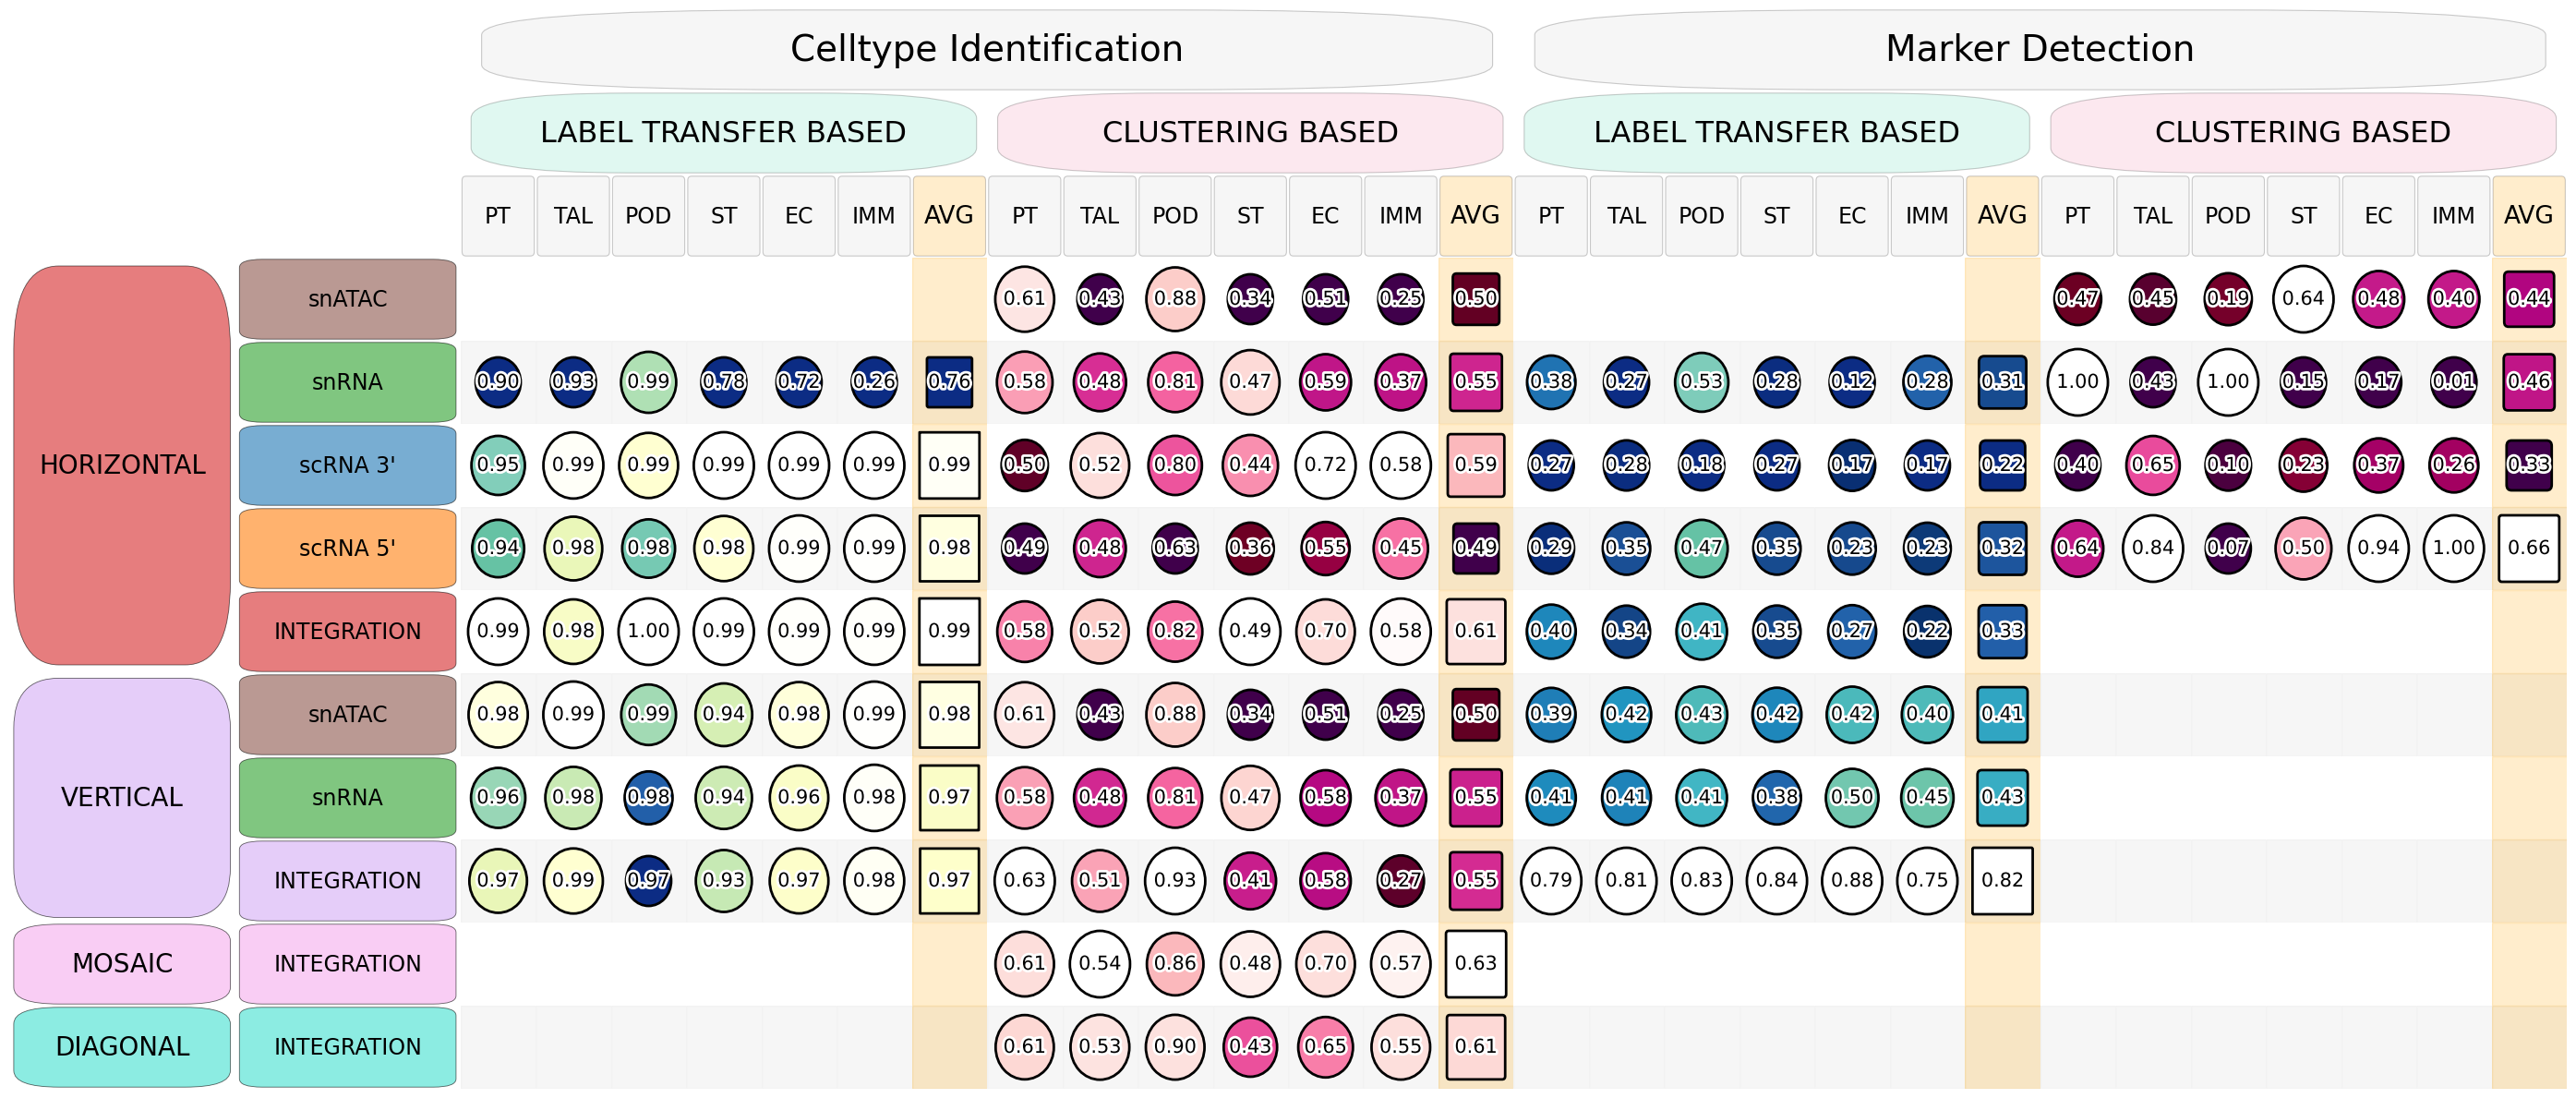

In [ ]:
normalize_blocks = [True, True, True, True]  # Normalize blocks 1 and 3 column-wise
plot_values = True  # Enable value plotting

cool_colors_enhanced = [
    "#0c2c84",  # deep blue
    "#08306b",  # darker blue
    "#225ea8",  # dark blue
    "#1d91c0",  # medium blue
    "#41b6c4",  # teal blue
    "#66c2a4",  # seafoam green
    "#7fcdbb",  # cyan
    "#a1dab4",  # light cyan
    "#c7e9b4",  # pale green-cyan
    "#e5f5b5",  # light yellow-green
    "#ffffcc",  # very pale yellow
    "#ffffff"   # pure white
]
warm_colors_enhanced = [
    "#40004b",  # deep purple
    "#67001f",  # dark violet
    # "#7201a8",  # violet
    "#980043",  # dark magenta
    "#ae017e",  # magenta
    "#c51b8a",  # pink-magenta
    "#dd3497",  # deep pink
    "#f768a1",  # medium pink
    "#fa9fb5",  # soft pink
    "#fcc5c0",  # light pink
    "#fde0dd",  # very light pink
    "#ffffff"   # pure white
]
avg_cmap = cmaps= [cool_colors_enhanced,warm_colors_enhanced, cool_colors_enhanced,warm_colors_enhanced]

generate_horizontal_summary_table(
    finale, texts_pop_col, texts_header_col_list, texts_header_row, 
    cmaps, avg_cmap, normalize_blocks, plot_values, figsize=(28, 12), value_normalized=False
)
plt.savefig('figures/FIG_6_COLUMNS_NORMALIZED_W_VALUES.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/FIG_6_COLUMNS_NORMALIZED_W_VALUES.pdf', dpi=600, bbox_inches='tight')

plt.show()

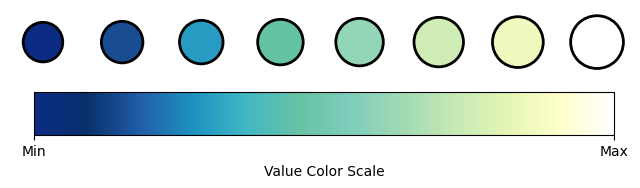

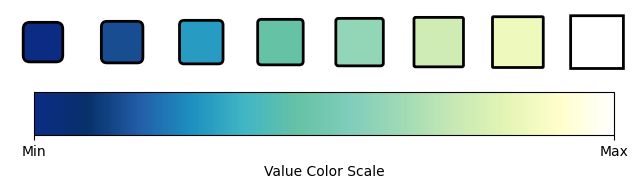

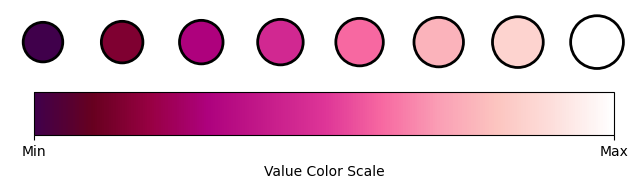

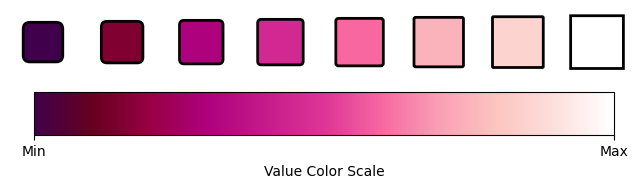

In [ ]:
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)


def create_colored_shape(value, colors, square=False,edgecolor='black', vmin=0, vmax=1, linewidth=1, base_size=0.6, size_factor=0.2):
    """Create a colored shape (circle or rounded square) based on a value."""
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    normalized_value = normalize(value, vmin, vmax)
    size = base_size + size_factor * normalized_value
    rounding_size = 0.1 * (1 - value) 
    if square:
        return FancyBboxPatch((0.5 - (size/2), 0.5 - (size/2)), size , size ,
                                boxstyle=f"round,pad=0,rounding_size={rounding_size}",
                               facecolor=cmap(normalized_value),
                               edgecolor=edgecolor, linewidth=linewidth)
    else:
        return Circle((0.5, 0.5), radius=size * 0.5, facecolor=cmap(normalized_value), edgecolor=edgecolor, linewidth=linewidth)




def create_size_color_legend(colors=['#ffff3f','#eeef20','#dddf00','#d4d700', '#bfd200','#aacc00','#80b918','#2b9348','#007f5f'],vmin_shape=0, vmin=0.5, vmax=1, values=[0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1],
                             edgecolor='black', linewidth=1, base_size=0.3,size_factor=0.5, legend_1 = True, square=False):
    """
    Create a custom legend that shows the variation of both size and color for different values, 
    and includes a horizontal color bar below the shapes.

    Parameters:
    - colors (list of str): A list of colors that will be used to create a smooth colormap.
    - vmin (float): Minimum value for normalization.
    - vmax (float): Maximum value for normalization.
    - values (list of float): Values to visualize in the legend.
    - edgecolor (str): Color of the shape's edge.
    - linewidth (int): Width of the shape's edge line.
    - base_size (float): Base size of the shape.
    - size_factor (float): Scaling factor for the size of shapes.
    """
    # Create a figure with GridSpec
    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(2, len(values), height_ratios=[0.4, 0.04], hspace=-0.7)

    # Create a colormap from the provided list of colors

    # Create a colormap from the provided list of colors
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    
    # Normalize the values, ensuring vmin corresponds to the first color and vmax to the last

    # Add a horizontal color bar below the shapes
    cbar_ax = fig.add_subplot(gs[1, :])  # Span the entire row for the color bar
       
    # Adjust the color bar position to add padding on the sides (left and right)
    box = cbar_ax.get_position()
    cbar_ax.set_position([box.x0 + 0.03, box.y0, box.width - 0.05, box.height])  # Adjust left and right padding
    norm_1 = mcolors.Normalize(vmin=0, vmax=0.85)
    norm_2 = mcolors.Normalize(vmin=0.85, vmax=vmax)
    # Create the color bar
            # Create the color bar
    norm = mcolors.Normalize(vmin=0, vmax=1)
    cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
    cb.set_label('Value Color Scale')
    plt.xticks(ticks=[0,1],labels=['Min','Max'])


    

    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    # Calculate size based on value
    # if value > vmin:
    for i, value in enumerate(values):
        # Create axes for the shape and the label
        ax_shape = fig.add_subplot(gs[0, i])
        # ax_label = fig.add_subplot(gs[1, i])

        # Hide the axes for both shape and label
        ax_shape.axis('off')
        size = base_size + size_factor * (value - vmin_shape)

        # print(vmin,vmax,value)
        # print(norm(value), value)
        # Check the value range to determine whether to create a Circle or Rounded Square

        # if value_ <= vmin:
        #     size = base_size
        #     # Create a circle for values between 0 and 0.75
        #     shape = Circle((0.5, 0.5), radius=size * 0.7, facecolor=cmap(norm_1(value_)),
        #                    edgecolor=edgecolor, linewidth=linewidth)
        shape = create_colored_shape(value, colors, square=square,edgecolor='black', vmin=0, vmax=1, linewidth=2, base_size=0.6, size_factor=0.2)
            # Add the shape to the axes
        ax_shape.add_patch(shape)
        # ax_shape.set_xlim(0, 1)
        # ax_shape.set_ylim(0, 1)
        ax_shape.set_aspect('equal')

        # Add the label below the shape
        # ax_label.text(0.5, 0.5, f'{value:.1f}', horizontalalignment='center', verticalalignment='center', fontsize=10)

    # Add a horizontal color bar below the shapes
    # cbar_ax = fig.add_subplot(gs[1,:])  # Span the entire row for the color bar
    # cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
    # cb.set_label('Value Color Scale')


cool_colors_enhanced = [
    "#0c2c84",  # deep blue
    "#08306b",  # darker blue
    "#225ea8",  # dark blue
    "#1d91c0",  # medium blue
    "#41b6c4",  # teal blue
    "#66c2a4",  # seafoam green
    "#7fcdbb",  # cyan
    "#a1dab4",  # light cyan
    "#c7e9b4",  # pale green-cyan
    "#e5f5b5",  # light yellow-green
    "#ffffcc",  # very pale yellow
    "#ffffff"   # pure white
]
warm_colors_enhanced = [
    "#40004b",  # deep purple
    "#67001f",  # dark violet
    # "#7201a8",  # violet
    "#980043",  # dark magenta
    "#ae017e",  # magenta
    "#c51b8a",  # pink-magenta
    "#dd3497",  # deep pink
    "#f768a1",  # medium pink
    "#fa9fb5",  # soft pink
    "#fcc5c0",  # light pink
    "#fde0dd",  # very light pink
    "#ffffff"   # pure white
]
for name,cmap in zip(['cold','warm'],[cool_colors_enhanced,warm_colors_enhanced]):
    create_size_color_legend(cmap,vmin=0, vmax=0.85, values=[0,0.15,.3,0.45,0.6, 0.75, 0.849,1])
    plt.savefig(f'figures/SUMMARY_TABLE_CMAP_{name}_CIRCLES.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(f'figures/SUMMARY_TABLE_CMAP_{name}_CIRCLES.png', dpi=300, bbox_inches='tight')
    create_size_color_legend(cmap,vmin=0.85, vmax=1, values=[0,0.15,.3,0.45,0.6, 0.75, 0.849,1], legend_1=False, square=True)
    plt.savefig(f'figures/SUMMARY_TABLE_CMAP_{name}_SQUARE.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(f'figures/SUMMARY_TABLE_CMAP_{name}_SQUARE.png', dpi=300, bbox_inches='tight')



In [ ]:
finale.to_csv('SUMMARY_TABLE_values.csv')

In [ ]:
finale = pd.read_csv('SUMMARY_TABLE_values.csv', index_col=0)
finale

,PT_ct_lt,TAL_ct_lt,POD_ct_lt,ST_ct_lt,EC_ct_lt,IMM_ct_lt,PT_ct_cb,TAL_ct_cb,POD_ct_cb,ST_ct_cb,...,POD_md_lt,ST_md_lt,EC_md_lt,IMM_md_lt,PT_md_cb,TAL_md_cb,POD_md_cb,ST_md_cb,EC_md_cb,IMM_md_cb
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.614578,0.431591,0.881311,0.344015,...,0.00000,0.00000,0.00000,0.00000,0.944306,0.057788,0.265388,0.614499,0.703152,0.344794
1,0.90377,0.74754,0.98843,0.70451,0.61354,0.26140,0.583736,0.481102,0.807295,0.474384,...,0.52941,0.28182,0.12025,0.27778,0.531913,0.155904,1.000000,0.078123,0.004394,0.000000
2,0.95102,0.99102,0.99481,0.99287,0.99383,0.99170,0.497103,0.524932,0.798861,0.443664,...,0.17647,0.27273,0.17089,0.16667,0.000000,0.721323,0.031669,0.172764,0.294133,0.258478
3,0.94264,0.98148,0.98440,0.97652,0.99069,0.98857,0.485384,0.477574,0.627045,0.360988,...,0.47059,0.35455,0.22785,0.23148,0.624592,0.980131,0.000000,0.500971,1.000000,1.000000
4,0.98896,0.98465,0.99693,0.99314,0.99117,0.98596,0.576658,0.518066,0.816055,0.492775,...,0.41176,0.35455,0.26582,0.22222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.95572,0.97521,0.97597,0.93851,0.96382,0.98299,0.614578,0.431591,0.881311,0.344015,...,0.41316,0.38356,0.50000,0.44706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.98366,0.99191,0.98769,0.94451,0.97579,0.98733,0.584010,0.478551,0.808923,0.471342,...,0.43390,0.41781,0.41558,0.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.97435,0.98658,0.97122,0.93446,0.96716,0.97653,0.626295,0.505736,0.933959,0.405573,...,0.82712,0.83562,0.88312,0.75294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.611061,0.535919,0.861067,0.484089,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.607955,0.526469,0.903027,0.426029,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
